In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf
yf.pdr_override()
import seaborn as sns

In [25]:
tickers = ["^BVSP", "USDBRL=X"]
carteira = web.get_data_yahoo(tickers, start="2007-01-01")["Close"]

In [26]:
carteira

Symbols,^BVSP,USDBRL=X
Date,,
2007-01-01,NaN,2.132500
2007-01-02,45383.00000,2.131000
2007-01-03,44445.00000,2.134500
2007-01-04,44020.00000,2.139000
2007-01-05,42245.00000,2.147000
...,...,...
2022-01-28,111478.00000,5.403485
2022-01-31,112388.00000,5.362600
2022-02-01,113147.00000,5.303100


In [27]:
carteira = carteira.dropna()
carteira

Symbols,^BVSP,USDBRL=X
Date,,
2007-01-02,45383.00000,2.131000
2007-01-03,44445.00000,2.134500
2007-01-04,44020.00000,2.139000
2007-01-05,42245.00000,2.147000
2007-01-08,42830.00000,2.146500
...,...,...
2022-01-28,111478.00000,5.403485
2022-01-31,112388.00000,5.362600
2022-02-01,113147.00000,5.303100


In [28]:
carteira.columns = ["IBOV", "DOLAR"]
carteira

,IBOV,DOLAR
Date,,
2007-01-02,45383.00000,2.131000
2007-01-03,44445.00000,2.134500
2007-01-04,44020.00000,2.139000
2007-01-05,42245.00000,2.147000
2007-01-08,42830.00000,2.146500
...,...,...
2022-01-28,111478.00000,5.403485
2022-01-31,112388.00000,5.362600
2022-02-01,113147.00000,5.303100


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

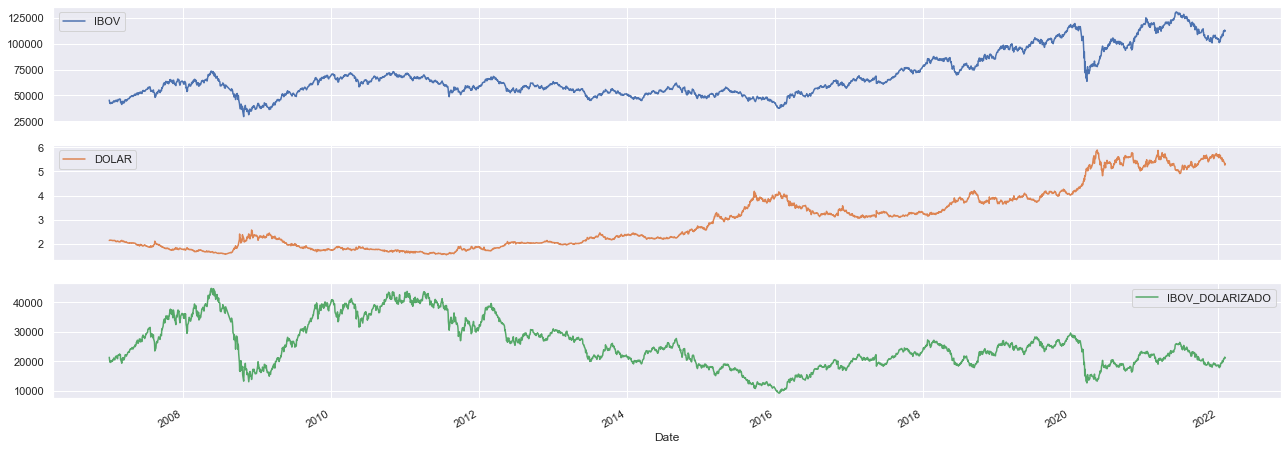

In [38]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8))

<AxesSubplot:>

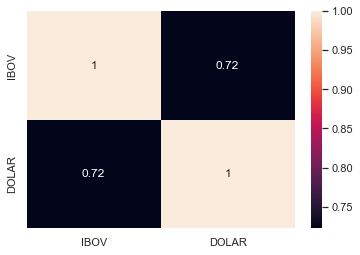

In [30]:
sns.heatmap(carteira.corr(), annot=True)

<AxesSubplot:xlabel='Date'>

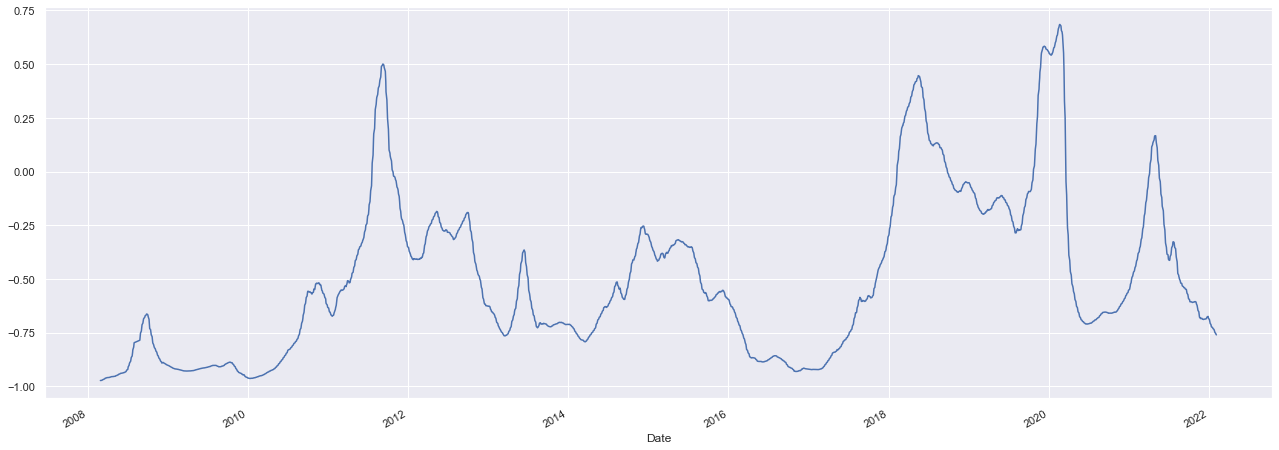

In [31]:
carteira["DOLAR"].rolling(252).corr(carteira["IBOV"]).plot(figsize=(22,8))

In [32]:
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"] / carteira["DOLAR"])
carteira

C:\Users\Pedro\AppData\Local\Temp\ipykernel_2428\2937611271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"] / carteira["DOLAR"])


,IBOV,DOLAR,IBOV_DOLARIZADO
Date,,,
2007-01-02,45383.00000,2.131000,21296.573959
2007-01-03,44445.00000,2.134500,20822.206345
2007-01-04,44020.00000,2.139000,20579.710732
2007-01-05,42245.00000,2.147000,19676.291819
2007-01-08,42830.00000,2.146500,19953.411504
...,...,...,...
2022-01-28,111478.00000,5.403485,20630.760275
2022-01-31,112388.00000,5.362600,20957.744965
2022-02-01,113147.00000,5.303100,21336.010573
